In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

import modelling

ModuleNotFoundError: No module named 'plotly'

In [6]:
testing_fig_dir = '../../figures/testing/'
final_fig_dir = '../../figures/binding_kinetics_comparison/' + \
    'OHaraCiPA_model/sensitivity_analysis/'

saved_fig_dir = final_fig_dir

saved_data_dir = '../../../simulation_data/sensitivity_analysis/'

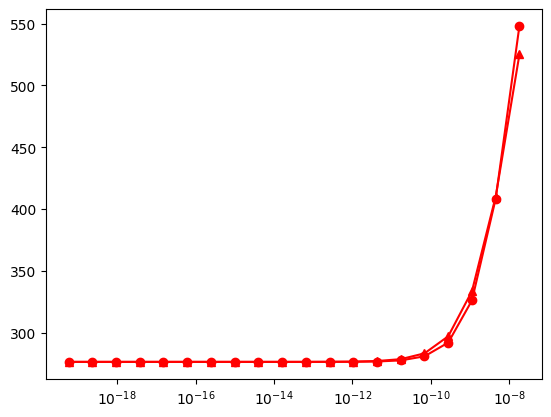

In [9]:
param_interest = 'N'

for drug in ['dofetilide']:

    filename = 'SA_' + drug + '_' + param_interest + '.csv'
    df = pd.read_csv(saved_data_dir + filename,
                     header=[0, 1], index_col=[0],
                     skipinitialspace=True)
    # data included: drug_conc_Hill, peak_current, Hill_curve, param_values,
    # drug_conc_AP, APD_trapping, APD_conductance and MSE

    param_lib = modelling.BindingParameters()
    param_true = param_lib.binding_parameters[drug][param_interest]

    # Plot APD90
    plt.figure()
#     for row_ind in range(len(df.index)):
#         figname = drug + '_' + param_interest + '_' + str(row_ind) + '_APD.pdf'
    row_ind = 1
    drug_conc_AP = df.iloc[[row_ind]]['drug_conc_AP'].values[0]
    APD_trapping = df.iloc[[row_ind]]['APD_trapping'].values[0]
    APD_conductance = df.iloc[[row_ind]]['APD_conductance'].values[0]
    plt.plot(drug_conc_AP, APD_trapping, 'o-', color='red')
    plt.plot(drug_conc_AP, APD_conductance, '^-', color='red')

    plt.xscale('log')
    plt.show()
#         plt.savefig(saved_fig_dir + figname)
#         plt.close()